In [7]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

In [8]:
from psaw import PushshiftAPI

In [9]:
api = PushshiftAPI()

In [10]:
#collecting comments from wallstreetbets containg the ticker TSLA or the Tesla company name. Selected
#a date range of bouncy prices as opposed to consistent trend one way or another


import datetime as dt
start_epoch=int(dt.datetime(2020, 12, 1).timestamp())
end_epoch=int(dt.datetime(2021, 2, 15).timestamp())


api_request_generator = api.search_comments(subreddit='wallstreetbets',q='(TSLA)|(Tesla)', after = start_epoch, before=end_epoch)


In [11]:
c_mentions1 = pd.DataFrame([comment.d_ for comment in api_request_generator])

In [12]:
start_epoch=int(dt.datetime(2021, 2, 16).timestamp())
end_epoch=int(dt.datetime(2021, 4, 30).timestamp())

api_request_generator2 = api.search_comments(subreddit='wallstreetbets',q='(TSLA)|(Tesla)', after = start_epoch, before=end_epoch)

In [13]:
c_mentions2 = pd.DataFrame([comment.d_ for comment in api_request_generator2])

C:\Users\carl_\anaconda3\lib\site-packages\psaw\PushshiftAPI.py:252: UserWarning: Not all PushShift shards are active. Query results may be incomplete
  warnings.warn(shards_down_message)


In [16]:
start_epoch=int(dt.datetime(2021, 5, 1).timestamp())
end_epoch=int(dt.datetime(2021, 6, 30).timestamp())

api_request_generator3 = api.search_comments(subreddit='wallstreetbets',q='(TSLA)|(Tesla)', after = start_epoch, before=end_epoch)

In [17]:
c_mentions3 = pd.DataFrame([comment.d_ for comment in api_request_generator3])

In [19]:


c_mentions = pd.concat([c_mentions1, c_mentions2, c_mentions3])


In [20]:
c_mentions.shape

(181957, 52)

In [21]:
c_mentions['date'] = pd.to_datetime(c_mentions['created_utc'], utc=True, unit='s')

In [22]:
c_mentions['date']

0       2021-02-15 06:50:17+00:00
1       2021-02-15 06:38:19+00:00
2       2021-02-15 06:37:03+00:00
3       2021-02-15 06:32:42+00:00
4       2021-02-15 06:30:51+00:00
                   ...           
23484   2021-05-01 07:55:50+00:00
23485   2021-05-01 07:32:11+00:00
23486   2021-05-01 06:54:55+00:00
23487   2021-05-01 06:34:43+00:00
23488   2021-05-01 06:22:06+00:00
Name: date, Length: 181957, dtype: datetime64[ns, UTC]

In [23]:
c_mentions['subreddit'].value_counts()

wallstreetbets    181957
Name: subreddit, dtype: int64

<AxesSubplot:>

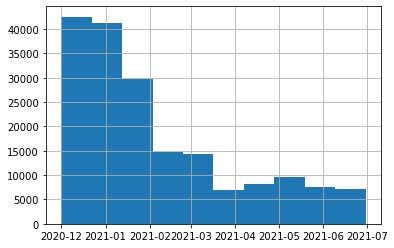

In [26]:
c_mentions['date'].hist()

In [27]:
c_mentions.head()

,all_awardings,associated_award,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,author_flair_type,author_fullname,author_patreon_flair,author_premium,awarders,body,collapsed_because_crowd_control,comment_type,created_utc,gildings,id,is_submitter,link_id,locked,no_follow,parent_id,...,send_replies,stickied,subreddit,subreddit_id,top_awarded_type,total_awards_received,treatment_tags,created,author_cakeday,media_metadata,archived,body_sha1,can_gild,collapsed,collapsed_reason,collapsed_reason_code,controversiality,distinguished,gilded,retrieved_utc,score_hidden,subreddit_name_prefixed,subreddit_type,edited,date
0,[],None,Responsible-Train-76,None,None,[],None,None,None,text,t2_7svl3z1d,False,False,[],"I do have 5 contracts for them because I think they’ll do better than Tesla with there trucks and they could probably compete with Tesla’s model X with there Ford Escape but again they need a new factory or replace there line ups so they can make the cars. You could also look at how Ford is primarily American while Tesla is in America, China, Germany (which is a huge win because VW is losing), and now announced a facility in India. I think they should focus more on there trucks and escapes b...",None,None,1613371817,{},gnifgoq,False,t3_lk7hpx,False,True,t1_gniesyn,...,True,False,wallstreetbets,t5_2th52,None,0,[],1.613397e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-15 06:50:17+00:00
1,[],None,Odd-Top650,None,None,[],None,None,None,text,t2_6xtjpdul,False,False,[],"I bought in at $8 a few months ago. I'm bullish as fuck for Ford. \n\nI did my own DD and you should do your own too but god damn look at the obvious..\n\n*It's fucking FORD. It's the 2nd largest US based automaker in the US. \n\n*Built ford tough mother fuckers. \nThis is the original pickup truck company. I love tesla, but the cybertruck is not going to outsell a classic sexy fully electric F150. Mark my words.\n\n*The new fully electric Mustang is starting at around $40k, competitive to T...",None,None,1613371099,{},gniekyx,False,t3_lk7hpx,False,True,t3_lk7hpx,...,True,False,wallstreetbets,t5_2th52,None,0,[],1.613396e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-15 06:38:19+00:00
2,[],None,xtow3,,None,"[{'e': 'text', 't': '210122:2:1'}]",None,210122:2:1,dark,richtext,t2_8bjukssj,False,False,[],TESLA IS MORE THAN A CAR COMPANY,None,None,1613371023,{},gniehl9,False,t3_likmpp,False,False,t1_gnieev1,...,True,False,wallstreetbets,t5_2th52,None,0,[],1.613396e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-15 06:37:03+00:00
3,[],None,HalinxHalo,None,None,[],None,None,None,text,t2_42nb0ro5,False,True,[],"I think Tesla is still THE ev vehicle, but I absolutely think it’s going to have to work hard to maintain its market share. I think the chip shortage/Covid is masking it a little. I have a friend whose 100% invested in Tesla and Tesla LEAPs, I’m legitimately worried about him over the next couple years.",None,None,1613370762,{},gnie5o3,False,t3_likmpp,False,True,t1_gnidl99,...,True,False,wallstreetbets,t5_2th52,None,0,[],1.613396e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-02-15 06:32:42+00:00
4,[],None,rozhasi,None,None,[],None,None,None,text,t2_7aroosmx,False,False,[],"Do not measure Ford or GM valuations by that of Tesla. Ford is under a tremendous debt and considered an uncool company while Tesla is a meme stock with a cult following of the CEO. \n\nTesla should be worth about 2/3 of Ford’s valuation while Ford is priced fairly now. Mach-E is not going to make a difference in the Ford’s bottom line. It’s a decent EV, but that’s not the reason for the stock to go to the moon. Tesla is not valued at $800 billion because it makes amazing EVs. Their mass pro...",None,None,1613370651,{},gnie0hu,False,t3_lk7dim,False,True,t3_lk7dim,...,True,False,wallstreetbets,t5_

In [28]:
c_mentions.to_csv('datapull2.csv')

In [ ]:
#pull daily prices from yahoo
#import datetime as dt
#import pandas as pd
#import pandas_datareader.data as web

#start = dt.datetime(2021,2,1)
#end = dt.datetime(2021,5,16)
#df = web.DataReader('TSLA','yahoo',start,end)
#where 'TSLA' is symbol name for Tesla.

#df.to_csv('TSLA.csv')

In [29]:
from datetime import date, timedelta, datetime # Date Functions

## Code for yfinance access adapted from relataly.com example by Florian Müller:
## https://www.relataly.com/stock-market-prediction-using-multivariate-time-series-in-python/1815/ 



# Setting the timeframe for the data extraction
today = date.today()
date_today = today.strftime("%Y-%m-%d")

# replace today with end date for range
date_today = '2021-07-01'
date_start = '2020-12-01'
 
# Getting NASDAQ quotes
stockname = 'TESLA'
symbol = 'TSLA'

# You can either use webreader or yfinance to load the data from yahoo finance
# import pandas_datareader as webreader
# df = webreader.DataReader(symbol, start=date_start, end=date_today, data_source="yahoo")

import yfinance as yf #Alternative package if webreader does not work: pip install yfinance
df = yf.download(symbol, start=date_start, end=date_today)

# Create a quick overview of the dataset
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,597.590027,597.849976,572.049988,584.760010,584.760010,40103500
2020-12-02,556.440002,571.539978,541.210022,568.820007,568.820007,47775700
2020-12-03,590.020020,598.969971,582.429993,593.380005,593.380005,42552000
2020-12-04,591.010010,599.039978,585.500000,599.039978,599.039978,29401300
2020-12-07,604.919983,648.789978,603.049988,641.760010,641.760010,56309700
...,...,...,...,...,...,...
2021-06-24,674.989990,697.619995,667.609985,679.820007,679.820007,45982400
2021-06-25,689.580017,693.809998,668.700012,671.869995,671.869995,32496700
2021-06-28,671.640015,694.700012,670.320007,688.719971,688.719971,21628200


In [30]:
df.to_csv('TSLA2.csv')